<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/Day7_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################### Load Fashion MNIST Data #####################################
import numpy as np
from keras.datasets import fashion_mnist as fmnist
(x_train,y_train),(x_test,y_test)=fmnist.load_data()
#x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
#x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x=np.concatenate([x_train,x_test])
x=(x.astype(np.float32) - 127.5)/127.5
x_images=np.expand_dims(x,axis=3)
y=np.concatenate([y_train,y_test])
x.shape,y.shape,x_images.shape

Using TensorFlow backend.


((70000, 28, 28), (70000,), (70000, 28, 28, 1))

In [0]:
##################################### Check Unique Value Counts ######################################################
count={}
for item in y:
  if item not in count:
    count[item]=1
  else:
    count[item]=count[item]+1
count

{0: 7000,
 1: 7000,
 2: 7000,
 3: 7000,
 4: 7000,
 5: 7000,
 6: 7000,
 7: 7000,
 8: 7000,
 9: 7000}

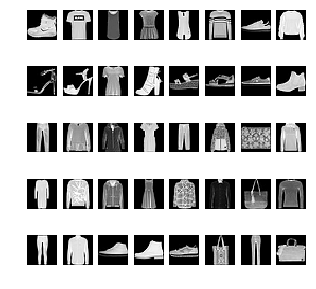

In [0]:
##################################################### View Some Images ###########################################################
ImageIndex=[]
zero=one=two=three=four=five=six=seven=eight=nine=0
for index in range(len(y)):
  if y[index] == 0:
    if zero < 4:
      ImageIndex.append(index)
      zero=zero+1
  elif y[index] == 1:
    if one < 4:
      ImageIndex.append(index)
      one=one+1
  elif y[index] == 2:
    if two < 4:
      ImageIndex.append(index)
      two=two+1
  elif y[index] == 3:
    if three < 4:
      ImageIndex.append(index)
      three=three+1
  elif y[index] == 4:
    if four < 4:
      ImageIndex.append(index)
      four=four+1
  elif y[index] == 5:
    if five < 4:
      ImageIndex.append(index)
      five=five+1
  elif y[index] == 6:
    if six < 4:
      ImageIndex.append(index)
      six=six+1
  elif y[index] == 7:
    if seven < 4:
      ImageIndex.append(index)
      seven=seven+1
  elif y[index] == 8:
    if eight < 4:
      ImageIndex.append(index)
      eight=eight+1
  else:
    if nine < 4:
      ImageIndex.append(index)
      nine=nine+1
Images=x[ImageIndex,:]
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig=plt.figure(figsize=(5,5))
columns=8
rows=5
for index in range(Images.shape[0]):
  img=Images[index]
  #img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

In [0]:
#################################################### Create Generator #############################################################
from keras.layers import Input,Dense,BatchNormalization,LeakyReLU,Reshape,Conv2DTranspose,Activation,Reshape
from keras.models import Model
from keras.optimizers import Adam
adam_opt=Adam(lr=0.0002,beta_1=0.5)

def create_gen():
  depth=256
  in_shape=100
  length=7
  breadth=7

  gen_input=Input(shape=(in_shape,))

  x=Dense(units=length*breadth*depth)(gen_input)
  x=BatchNormalization(momentum=0.9)(x)
  x=Reshape((length,breadth,depth))(x)
  x=LeakyReLU(0.2)(x)


  x=Conv2DTranspose(filters=int(depth/2),strides=(1,1),kernel_size=(8,8))(x)
  x=BatchNormalization(momentum=0.9)(x)
  x=LeakyReLU(0.2)(x)

  x=Conv2DTranspose(filters=int(depth/4),strides=(1,1),kernel_size=(15,15))(x)
  x=BatchNormalization(momentum=0.9)(x)
  x=LeakyReLU(0.2)(x)

  x=Conv2DTranspose(filters=int(depth/8),strides=(1,1),kernel_size=(1,1))(x)
  x=BatchNormalization(momentum=0.9)(x)
  x=LeakyReLU(0.2)(x)


  x=Conv2DTranspose(filters=1,kernel_size=(1,1))(x)
  x=BatchNormalization(momentum=0.9)(x)
  gen_output=Activation('tanh')(x)

  gen_model=Model(gen_input,gen_output)
  gen_model.compile(loss='binary_crossentropy',optimizer=adam_opt)
  return gen_model

gen=create_gen()
gen.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       2097280   
________________________

In [0]:
############################################################# Create Discriminator ###################################################################
from keras.layers import Conv2D,Dropout,Flatten
ini_len=28
ini_bre=28
ini_dep=1

def create_dis():
  Discr_Input=Input(shape=(ini_len,ini_bre,1))

  x=Conv2D(filters=ini_dep*64,strides=(1,1),kernel_size=(15,15))(Discr_Input)
  x=LeakyReLU(0.2)(x)
  x=Dropout(0.3)(x)

  x=Conv2D(filters=ini_dep*128,strides=(1,1),kernel_size=(8,8))(x)
  x=LeakyReLU(0.2)(x)
  x=Dropout(0.3)(x)

  x=Conv2D(filters=ini_dep*256,strides=(1,1),kernel_size=(4,4))(x)
  x=LeakyReLU(0.2)(x)
  x=Dropout(0.3)(x)

  x=Conv2D(filters=ini_dep*512,strides=(1,1),kernel_size=(1,1))(x)
  x=LeakyReLU(0.2)(x)
  x=Dropout(0.3)(x)

  x=Flatten()(x)
  Discr_Output=Dense(units=1,activation='sigmoid')(x)
  
  Disc_Model=Model(Discr_Input,Discr_Output)
  Disc_Model.compile(loss='binary_crossentropy',optimizer=adam_opt)
  return Disc_Model

discriminator=create_dis()
discriminator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        14464     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         524416    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
__________

In [0]:
######################################## Create GAN #################################################################
def create_gan(discriminator,generator):
  discriminator.trainable=False
  gan_input=Input(shape=(100,))
  x=generator(gan_input)
  gan_output=discriminator(x)
  gan=Model(gan_input,gan_output)
  gan.compile(optimizer='adam',loss='binary_crossentropy')
  return gan
gan=create_gan(discriminator,gen)
gan.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 28, 28, 1)         5260677   
_________________________________________________________________
model_2 (Model)              (None, 1)                 1203201   
Total params: 6,463,878
Trainable params: 5,235,139
Non-trainable params: 1,228,739
_________________________________________________________________


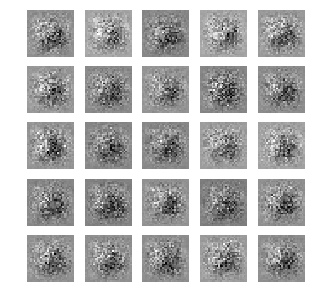

In [0]:
############################################# Generate Sample Images using Untrained Generator model ####################################################
noise= np.random.normal(loc=0, scale=1, size=[25, 100])
gen=create_gen()
generated_images = gen.predict(noise)
fig=plt.figure(figsize=(5,5))
columns=5
rows=5
for index in range(0,generated_images.shape[0]):
  img=generated_images[index]
  img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray',interpolation='none')
  plt.axis('off')
plt.show()

Epoch: 1 || [Elapsed Time: 0:02:03.598552 ]


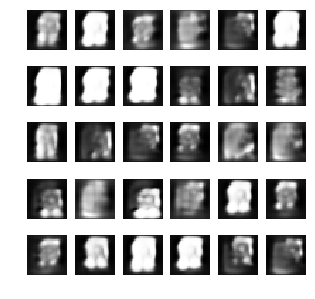

Epoch: 10 || [Elapsed Time: 0:01:57.418050 ]


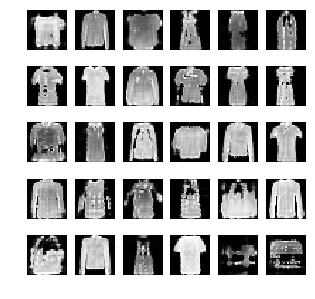

Epoch: 20 || [Elapsed Time: 0:01:57.731664 ]


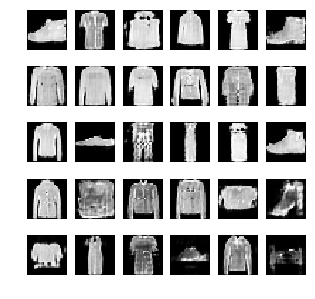

Epoch: 30 || [Elapsed Time: 0:01:57.930290 ]


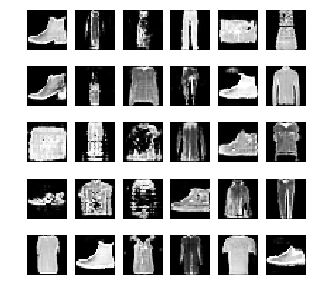

Epoch: 40 || [Elapsed Time: 0:01:57.907711 ]


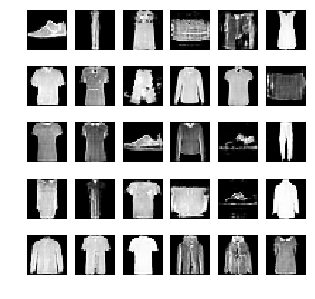

Epoch: 50 || [Elapsed Time: 0:01:57.447966 ]


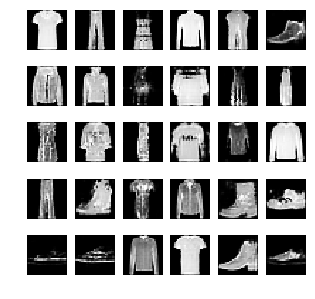

Epoch: 60 || [Elapsed Time: 0:01:57.648603 ]


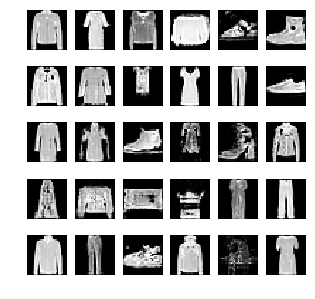

Epoch: 70 || [Elapsed Time: 0:01:57.312680 ]


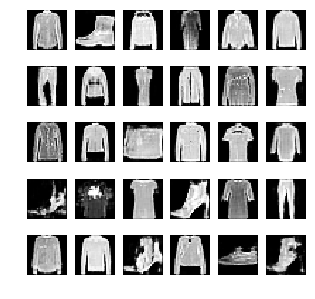

Epoch: 80 || [Elapsed Time: 0:01:57.467915 ]


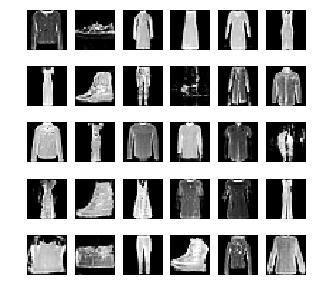

Epoch: 90 || [Elapsed Time: 0:01:57.179507 ]


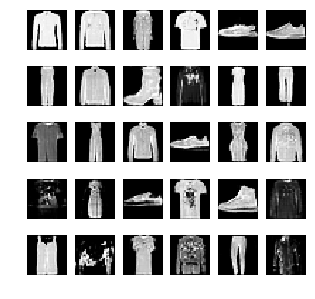

Epoch: 100 || [Elapsed Time: 0:01:57.160200 ]


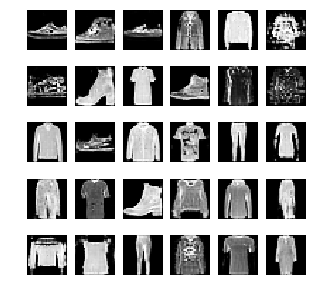

In [8]:
#################################################################### Train GAN #########################################################################
import datetime
def training_gan(epochs,batch_size):
  batch_count = x.shape[0] / batch_size
  generator= create_gen()
  discriminator= create_dis()
  gan = create_gan(discriminator, generator)
  for e in range(1,epochs+1):
    start_time=datetime.datetime.now()
    for count in range(int(batch_count)):
      ######################### generate random noise as input ##########################
      noise=np.random.normal(loc=0, scale=1, size=[batch_size, 100])
      ######################### generate fake random images #############################
      gen_images_batch=generator.predict(noise)
      #print(str(gen_images_batch.shape))
      ######################### get random set of real images ###########################
      real_images_batch=x_images[np.random.randint(low=0,high=x.shape[0],size=batch_size)]
      #print(str(real_images_batch.shape))
      ######################## construct batch of real and fake data ####################
      Image_batch=np.concatenate([real_images_batch,gen_images_batch])
      ######################## construct labels of real and fake data ####################
      Image_Labels=np.zeros(2*batch_size) 
      Image_Labels[:batch_size]=0.9 ## real image label is 0.9 and fake image label is 0
      #print(str(Image_Labels))
      ############# Train Discriminator on this image set before starting gan training ####
      discriminator.trainable=True
      discriminator.train_on_batch(Image_batch,Image_Labels)
      ######## Now since the discriminator has been trained so we will not train discriminator again ###########
      discriminator.trainable=False
      
      """
      ################## Check if Discriminator has been trained well #####################
      fake_pred_disc=discriminator.predict(gen_images_batch)
      real_pred_disc=discriminator.predict(real_images_batch)
      print("Discriminator Prediction at batch count: "+str(count+1)+"|| Fake Image: "+str(fake_pred_disc)+" || Real Image: "+str(real_pred_disc))"""
      
      ############################## Creating Target Labels for GAN ########################
      noise=np.random.normal(0,1, [batch_size, 100])
      GAN_Image_Labels=np.ones(batch_size)
      ################# Keeping discriminator off we will train generator ##################
      gan.train_on_batch(noise,GAN_Image_Labels)
      ################# Predict new images using Generator #################################
      end_time=datetime.datetime.now()
      elapsed_time=str(end_time-start_time)
    if e==1 or e % 10==0:
      print("Epoch: "+str(e)+" || [Elapsed Time: "+elapsed_time+" ]")
      noise=np.random.normal(loc=0, scale=1, size=[30, 100])
      gen_images_batch=generator.predict(noise)
      fig=plt.figure(figsize=(5,5))
      columns=6
      rows=5
      for index in range(0,gen_images_batch.shape[0]):
        img=gen_images_batch[index]
        img=img.reshape((28,28))
        fig.add_subplot(rows, columns, index+1)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
      plt.show()
training_gan(epochs=100,batch_size=128)        